<a href="https://colab.research.google.com/github/3lson/QuantumSVMproj/blob/main/QuantumSVM_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quantum Support Vector Machine for Iris Classification

In [ ]:
!pip uninstall qiskit qiskit-aer qiskit-machine-learning qiskit-terra -y

Found existing installation: qiskit 0.43.1
Uninstalling qiskit-0.43.1:
  Successfully uninstalled qiskit-0.43.1
Found existing installation: qiskit-aer 0.12.0
Uninstalling qiskit-aer-0.12.0:
  Successfully uninstalled qiskit-aer-0.12.0
Found existing installation: qiskit-machine-learning 0.7.2
Uninstalling qiskit-machine-learning-0.7.2:
  Successfully uninstalled qiskit-machine-learning-0.7.2
Found existing installation: qiskit-terra 0.24.1
Uninstalling qiskit-terra-0.24.1:
  Successfully uninstalled qiskit-terra-0.24.1


In [ ]:
!pip install qiskit==0.45.0 qiskit-aer==0.12.0 qiskit-machine-learning==0.5.0


  Using cached qiskit_aer-0.12.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.2 kB)
Using cached qiskit_aer-0.12.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.8 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.8/152.8 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 62.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.8/95.8 kB 9.7 MB/s eta 0:00:00
  Attempting uninstall: dill
    Found existing installation: dill 0.3.9
    Uninstalling dill-0.3.9:
      Successfully uninstalled dill-0.3.9


In [ ]:
import qiskit
import qiskit_machine_learning
import qiskit_aer

print(f"Qiskit version: {qiskit.__version__}")
print(f"Qiskit-Aer version: {qiskit_aer.__version__}")
print(f"Qiskit Machine Learning version: {qiskit_machine_learning.__version__}")


Qiskit version: 0.45.0
Qiskit-Aer version: 0.12.0
Qiskit Machine Learning version: 0.5.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

# Qiskit libraries
from qiskit import QuantumCircuit, execute
from qiskit_aer import Aer  # Import Aer from qiskit_aer
from qiskit.utils import QuantumInstance
from qiskit_machine_learning.kernels import QuantumKernel
from qiskit_machine_learning.algorithms.classifiers import QSVC
from qiskit.circuit.library import ZZFeatureMap  # Import the feature map

In [ ]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Binary classification: Only classify two species (0 and 1)
X = X[y != 2]
y = y[y != 2]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
from sklearn.svm import SVC

# Classical Support Vector Classifier (SVC)
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

# Predict on the test data
y_pred_classical = svc.predict(X_test)

# Calculate accuracy
accuracy_classical = accuracy_score(y_test, y_pred_classical)
print(f"Classical SVC Accuracy: {accuracy_classical * 100:.2f}%")


Classical SVC Accuracy: 100.00%


In [ ]:
def create_quantum_circuit(x):
    qc = QuantumCircuit(len(x))
    for i, xi in enumerate(x):
        qc.ry(xi, i)  # Encode data using Ry rotations
    return qcs


In [ ]:
# Create a quantum instance using the 'qasm_simulator' backend
backend = Aer.get_backend('qasm_simulator')

# Create the quantum kernel using a feature map
feature_map = ZZFeatureMap(feature_dimension=4, entanglement='linear')

# Create the Quantum Kernel with the backend
quantum_kernel = QuantumKernel(feature_map=feature_map, quantum_instance=backend)

# Create the Quantum Support Vector Classifier (QSVC)
qsvc = QSVC(quantum_kernel=quantum_kernel)

# Fit the QSVC model on the training data
qsvc.fit(X_train, y_train)

# Predict on the test data using the QSVC model
y_pred_quantum = qsvc.predict(X_test)

# Calculate accuracy for QSVC
accuracy_quantum = accuracy_score(y_test, y_pred_quantum)
print(f"Quantum SVC Accuracy: {accuracy_quantum * 100:.2f}%")


Quantum SVC Accuracy: 80.00%


In [ ]:
def plot_decision_boundaries(X, y, model, title):
    # Create a mesh to plot
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Use only the first two features for prediction
    Z = model.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros(xx.ravel().shape[0]), np.zeros(xx.ravel().shape[0])])
    Z = Z.reshape(xx.shape)

    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title(title)
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.show()


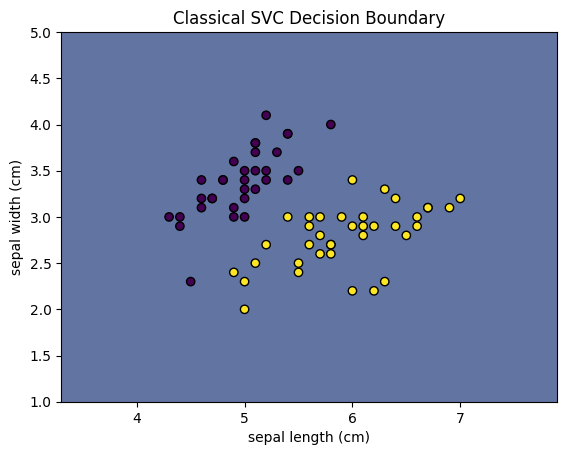

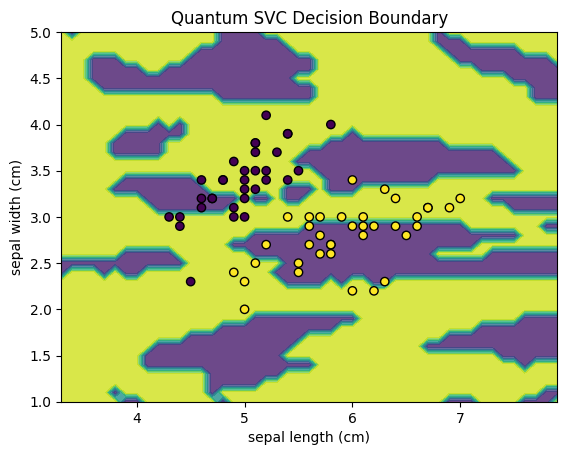

In [ ]:
# For classical SVC
plot_decision_boundaries(X_train, y_train, svc, "Classical SVC Decision Boundary")

# For QSVC
plot_decision_boundaries(X_train, y_train, qsvc, "Quantum SVC Decision Boundary")


In the Quantum SVM experiment, you use a quantum kernel to map classical data to a higher-dimensional quantum feature space. The QSVM then classifies the data points based on their position in this quantum feature space. This project compares the accuracy of a classical SVM with a quantum-enhanced SVM.

Results: The decision boundaries for both classical and quantum SVM models are visualized. The QSVM leverages quantum mechanics to potentially provide a more complex decision boundary, especially for non-linear data. While quantum speedup may not be evident for small datasets, this experiment highlights how quantum computing can offer new ways to handle complex machine learning tasks.